# Customer Segmentation Classification (Automobile Industry)

# Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Test & Train datasets

In [2]:
train_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Train.csv")

In [3]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train_df.shape

(8068, 11)

In [5]:
# test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")
# test_df.head()

In [62]:
# test_df.shape

# Exploratory Data Analysis

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
df = train_df.copy()

In [10]:
df["Profession"].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [11]:
print(df["Spending_Score"].unique())
print(df["Spending_Score"].value_counts())

['Low' 'Average' 'High']
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


In [12]:
print(df["Var_1"].unique())
print(df["Var_1"].value_counts())

['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [59]:
print(df["Work_Experience"].unique())
print(df["Work_Experience"].value_counts())

[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64


In [13]:
print(df["Family_Size"].unique())
print(df["Family_Size"].value_counts())

[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

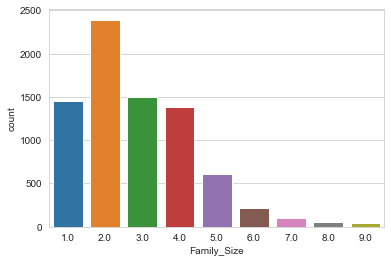

In [14]:
sns.set_style('whitegrid')
sns.countplot(df['Family_Size'])

<AxesSubplot:>

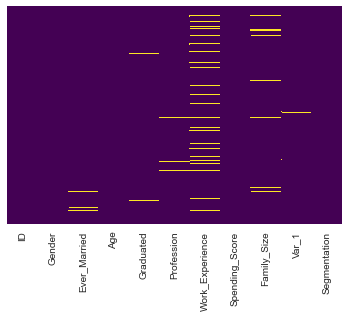

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
df.Work_Experience.isnull().values.any()

True

### Categorical Column

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

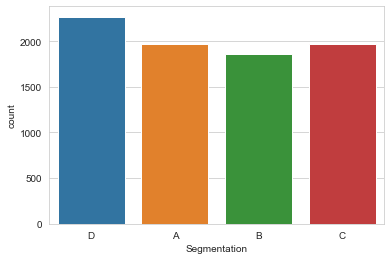

In [15]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'])

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

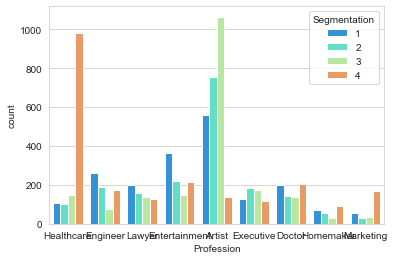

In [65]:
sns.set_style('whitegrid')
sns.countplot(df['Profession'], hue=df['Segmentation'], palette='rainbow')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

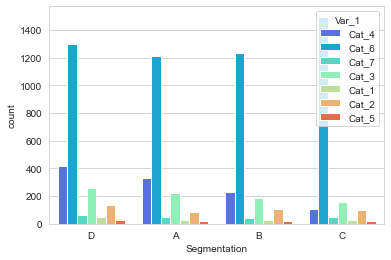

In [16]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'], hue=df['Var_1'], palette='rainbow')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

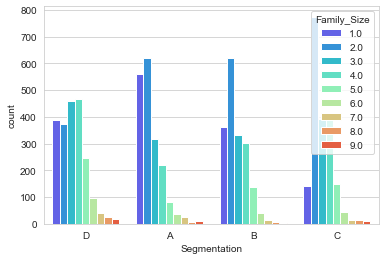

In [41]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'], hue=df['Family_Size'], palette='rainbow')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

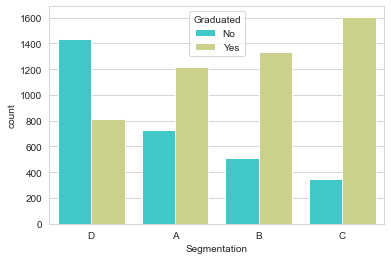

In [35]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'], hue=df['Graduated'], palette='rainbow')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

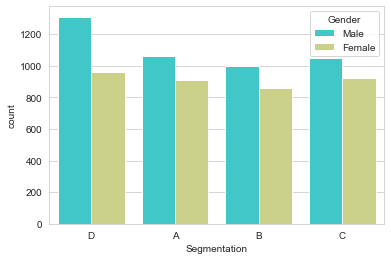

In [46]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'], hue=df['Gender'], palette='rainbow')

### Numerical Feature

In [48]:
change_var = {"Segmentation":     {"A": 1, "B": 2, "C": 3, "D":4}}

In [49]:
df = df.replace(change_var)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1


In [50]:
df.corr()

,ID,Age,Work_Experience,Family_Size,Segmentation
ID,1.000000,-0.005055,-0.030688,0.011801,-0.009104
Age,-0.005055,1.000000,-0.190789,-0.280517,-0.243552
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234,0.012993
Family_Size,0.011801,-0.280517,-0.063234,1.000000,0.196213
Segmentation,-0.009104,-0.243552,0.012993,0.196213,1.000000


<AxesSubplot:>

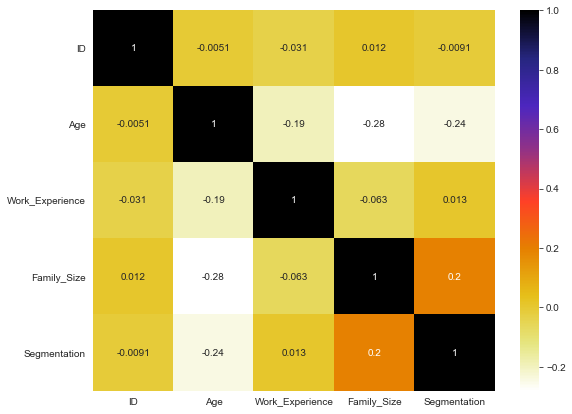

In [72]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

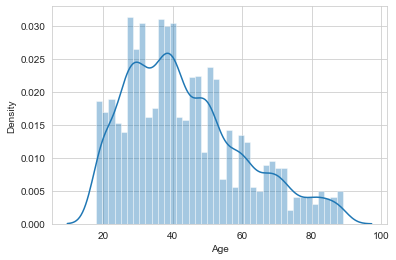

In [57]:
sns.distplot(df['Age'].dropna(), bins=40)

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work_Experience', ylabel='Density'>

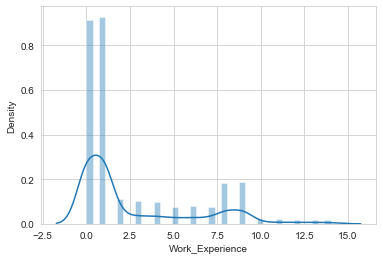

In [58]:
sns.distplot(df['Work_Experience'].dropna(), bins=40)

In [61]:
print(min(df.Work_Experience))
print(max(df.Work_Experience))

0.0
14.0


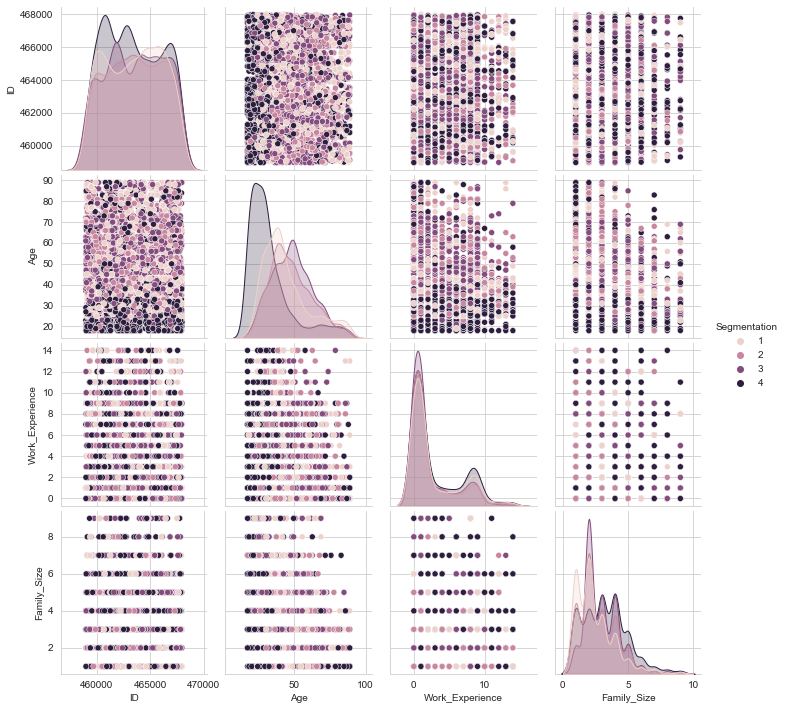

In [54]:
sns.pairplot(df, hue='Segmentation')

# Feature Engineering